In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
import sncosmo
import varpop
import snpop

In [3]:
from snpop import SimpleSALTPopulation, GMM_SALTPopulation

In [4]:
from collections import OrderedDict

In [5]:
print(sncosmo.__version__)
print(varpop.__version__)
print(snpop.__version__)

1.5.3
0.1.0
0.1.5


# GMM SALT Distributions

The SALT model used for SNIa has the following parameters for each SNIa :
```x0, x1, c, z, t0 ```. `t0` is the time of the peak in B band, and this is expected to be uniformly distributed in time. The remaining parameters are from a population distribution, which was trained on the SNLS data by David Rubin. The result is parametrized in terms of a distribution of ```x1, c, mBB``` where `mBB` is an auxillary parameter, related to `mB` the `BessellB` band peak magnitude by a `H0=70` cosmology distance. The model here adds an intrinsic dispersion in the luminosity.

As, with `SimpleSALTPopulation`, there are two ways to use `GMM_SALTPopulation`:
1. Use it with a supplied sample of SN redshifts.
2. Supply it with the area of the sky, the duration of the survey, and the redshift bounds, and it will use a powerlaw rate for SN to obtain a redshift sample, and run through with the previous case. 

To start with we describe the first case

### `GMM_SALTPopulation`

obtain a set of samples for the redshift

In [6]:
zSamples = np.random.uniform(0, 1.0, size=10)
print(zSamples)

[ 0.79647466  0.8414543   0.22263925  0.36755547  0.00899544  0.53472295
  0.95582139  0.7039094   0.45199513  0.40171653]


Instantiate the object

In [7]:
gp = GMM_SALTPopulation(zSamples, rng=np.random.RandomState(1))

In [8]:
gp.idxvalues

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
all(gp.zSamples == zSamples)

True

In [10]:
gp.cosmo

FlatLambdaCDM(name="Planck15", H0=67.7 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[ 0.    0.    0.06] eV, Ob0=0.0486)

In [11]:
gp.paramsTable

,Mabs,MnoDisp,c,mB,mBB,t0,x0,x1,z,model
idx,,,,,,,,,,
0,-19.181419,-19.443140,-0.058708,24.370762,24.109040,61102.130317,2.833297e-06,0.582514,0.796475,SALT2
1,-19.385283,-19.271102,-0.081481,24.313299,24.427480,62209.184401,2.989956e-06,-1.206104,0.841454,SALT2
2,-19.448615,-19.496471,-0.088887,20.836860,20.789004,59580.417468,7.342866e-05,0.264430,0.222639,SALT2
3,-18.922170,-18.884765,-0.007723,22.612318,22.649723,60683.513890,1.433366e-05,-2.298455,0.367555,SALT2
4,-19.253680,-19.472997,-0.074439,13.761216,13.541900,60115.659001,4.967280e-02,0.431247,0.008995,SALT2
5,-19.575240,-19.266218,-0.024769,22.925352,23.234373,59917.035871,1.072678e-05,0.697817,0.534723,SALT2
6,-18.521246,-18.472883,0.101307,25.517773,25.566136,60259.849772,9.862645e-07,-2.750346,0.955821,SALT2
7,-19.718884,-19.661276,-0.155729,23.505096,23.562704,60841.296654,6.285651e-06,-0.097747,0.703909,SALT2
8,-18.911581,-19.081646,0.052124,23.152632,22.982567,61028.201281,8.696140e-06,1.151479,0.451995,SALT2


In [12]:
gp.modelParams(3)

OrderedDict([('Mabs', -18.922170434978462),
             ('MnoDisp', -18.884764878656849),
             ('c', -0.0077234443644439224),
             ('mB', 22.612317604494855),
             ('mBB', 22.649723160816468),
             ('t0', 60683.513890106216),
             ('x0', 1.4333656865173499e-05),
             ('x1', -2.2984551232434574),
             ('z', 0.36755547408060329),
             ('model', 'SALT2')])

### 2. Generate From the skyArea, redshift bounds and survey Duration

This uses the `fromSkyArea` method

In general, we will not have a redshift distribution or a redshift sample to use. In this case, we prefer to use 
the `fromSkyArea` method which instead obtains these samples from using the fieldArea, zmin and zmax. Right now, we also need `numzBins` because of the binned implementation which we will later get rid of.

In [13]:
gpz = GMM_SALTPopulation.fromSkyArea(rng=np.random.RandomState(1), fieldArea=0.5)

In [14]:
gpz.zSamples.size

1359

In [15]:
gpz.numSources

1359

In [16]:
gpz.paramsTable.head()

,Mabs,MnoDisp,c,mB,mBB,t0,x0,x1,z,model
idx,,,,,,,,,,
0,-19.431781,-19.231343,-0.113137,19.477864,19.678303,62172.794211,0.000257,-2.238166,0.125250,SALT2
1,-19.611670,-19.663938,-0.117799,19.679116,19.626848,61243.098500,0.000213,0.809342,0.147226,SALT2
2,-19.358236,-19.199378,0.024133,20.294084,20.452943,61789.027067,0.000121,0.743037,0.171353,SALT2
3,-18.774568,-18.737321,0.071606,21.293352,21.330599,63194.982619,0.000048,-0.905112,0.203602,SALT2
4,-19.046238,-19.063642,0.031013,21.324655,21.307252,62404.794312,0.000047,-0.086241,0.230553,SALT2


## Characterizations of the Distribution

## Form of the internal dispersion

In [17]:
import scipy

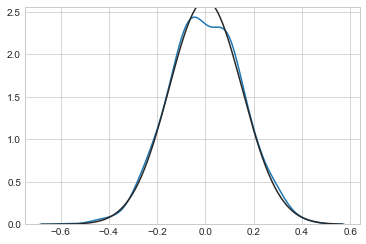

In [18]:
fig, ax = plt.subplots()
sns.distplot(gpz.paramsTable.Mabs - gpz.paramsTable.MnoDisp, hist=False, fit=scipy.stats.norm)

## Checks on the Hubble Diagram

In [19]:
from astropy.cosmology import Planck15

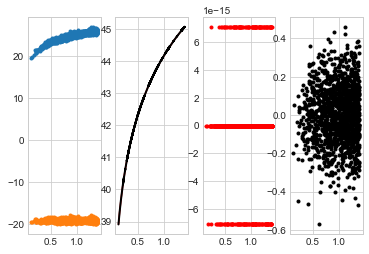

In [20]:
fig, ax = plt.subplots(1, 4)
ax[0].plot(gpz.paramsTable.z, gpz.paramsTable.mB, '.')
ax[0].plot(gpz.paramsTable.z, gpz.paramsTable.Mabs, '.')
ax[1].plot(gpz.paramsTable.z, gpz.paramsTable.mB - gpz.paramsTable.Mabs, color='r')
ax[1].plot(gpz.paramsTable.z, Planck15.distmod(gpz.paramsTable.z).value, color='k', lw=2)
ax[2].plot(gpz.paramsTable.z, gpz.paramsTable.mB - gpz.paramsTable.Mabs - Planck15.distmod(gpz.paramsTable.z).value, 'r.')
ax[3].plot(gpz.paramsTable.z, gpz.paramsTable.mB - gpz.paramsTable.MnoDisp - Planck15.distmod(gpz.paramsTable.z).value, 'k.')

## Distribution of x1 and c

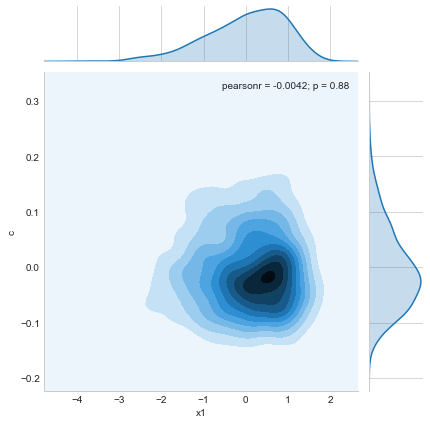

In [21]:
#fig = plt.figure(figsize=(6,6))
jp = sns.jointplot(data=gpz.paramsTable, x='x1', y='c', kind='kde')
jp.fig.set_figheight(6)
jp.fig.set_figwidth(6)

In [22]:
gpz.paramsTable.c.std()

0.07237693472284888

In [23]:
gpz.paramsTable.x1.std()

0.9459601513058118